In [0]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',None)
import seaborn as sns


from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE
from statistics import mean 

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
%matplotlib inline 

In [0]:
df = pd.read_csv("train.csv")

<h2> Feature Engineering </h2>

In [0]:
df['AdoptionSpeed'].value_counts()

In [0]:
def adoption(row):
    if row['AdoptionSpeed'] <= 2:
        return 0
    if row['AdoptionSpeed'] == 3:
        return 1
    return 2
df['Adoption'] = df.apply(lambda row: adoption(row),axis=1)

one pet
0    0.674154
1    0.733679
Name: Adoption_Speed_binary1, dtype: float64

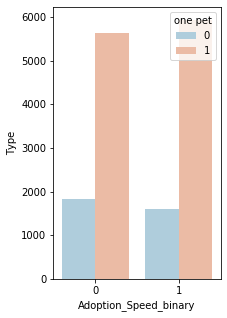

In [0]:
# Transform the output variable into binary variable
df['Adoption_Speed_binary'] = np.where(df['AdoptionSpeed'] <=2 ,1,0)
df['Adoption_Speed_binary1'] = np.where(df['AdoptionSpeed'] <=3,1,0)
# Whethere these is only 1 pet
df['one pet'] = np.where(df['Quantity']==1,1,0)
grouped = pd.DataFrame(df.groupby(['one pet','Adoption_Speed_binary'])['Type'].agg('count'))
grouped.reset_index(inplace=True)
plt.figure(figsize=(3,5))

sns.barplot(x='Adoption_Speed_binary', hue="one pet", y='Type', data=grouped,palette="RdBu_r")

df.groupby("one pet")['Adoption_Speed_binary'].mean()

Meaningful Name
0    2.559621
1    2.511337
Name: AdoptionSpeed, dtype: float64

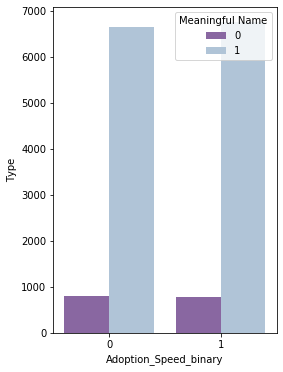

In [0]:
# Name
df['Meaningful Name'] = np.where(((df['Name'].str.contains('NaN') != False)|(df['Name'].str.contains('Yet',na=False))| (df['Name'].str.contains('No Name', na=False)) | (df['Name'].str.len()<3)),0,1)
grouped = pd.DataFrame(df.groupby(['Meaningful Name','Adoption_Speed_binary'])['Type'].agg('count'))
grouped.reset_index(inplace=True)
plt.figure(figsize=(4,6))

sns.barplot(x='Adoption_Speed_binary', hue="Meaningful Name", y='Type', data=grouped,palette="BuPu_r")
df.groupby('Meaningful Name')['AdoptionSpeed'].mean()

MixType
0    2.352673
1    2.721846
Name: AdoptionSpeed, dtype: float64

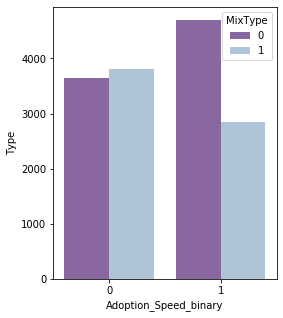

In [0]:
# MixType
df['MixType'] = np.where(((df['Breed1']==307) | (df['Breed2']==307)),1,0)
grouped = pd.DataFrame(df.groupby(['MixType','Adoption_Speed_binary'])['Type'].agg('count'))
grouped.reset_index(inplace=True)
plt.figure(figsize=(4,5))

sns.barplot(x='Adoption_Speed_binary', hue="MixType", y='Type', data=grouped,palette="BuPu_r")
df.groupby('MixType')['AdoptionSpeed'].mean()

1    7952
0    7041
Name: Young, dtype: int64

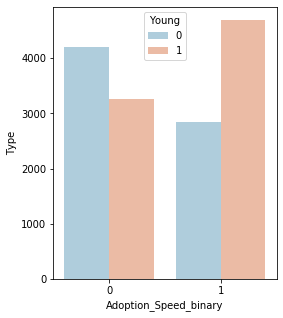

In [0]:
# Age
df['Young'] = np.where((df['Age']<4),1,0)
grouped = pd.DataFrame(df.groupby(['Young','Adoption_Speed_binary'])['Type'].agg('count'))
grouped.reset_index(inplace=True)
plt.figure(figsize=(4,5))

sns.barplot(x='Adoption_Speed_binary', hue="Young", y='Type', data=grouped,palette="RdBu_r")
df.groupby('Young')['AdoptionSpeed'].mean()
df['Young'].value_counts()

Free
0    2.569528
1    2.506673
Name: AdoptionSpeed, dtype: float64

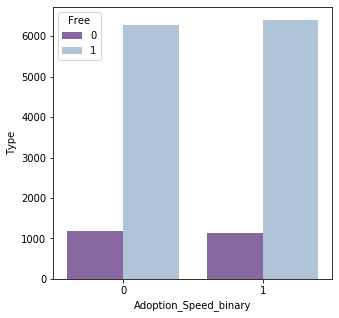

In [0]:
# "Free"
df['Free'] = np.where(df['Fee']==0,1,0)

grouped = pd.DataFrame(df.groupby(['Free','Adoption_Speed_binary'])['Type'].agg('count'))
grouped.reset_index(inplace=True)
plt.figure(figsize=(5,5))

sns.barplot(x='Adoption_Speed_binary', hue="Free", y='Type', data=grouped,palette="BuPu_r")
df.groupby('Free')['AdoptionSpeed'].mean()

Type  Top_rescuer
1     0              0.451880
      1              0.506682
2     0              0.546517
      1              0.645161
Name: Adoption_Speed_binary, dtype: float64

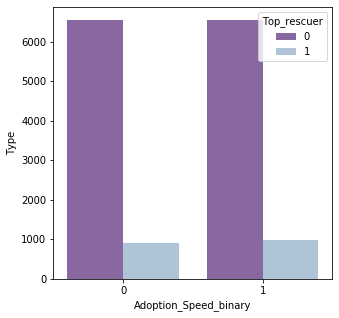

In [0]:
# Rescue ID
top_rescuer = pd.DataFrame(df['RescuerID'].value_counts())
top_rescuer.reset_index(inplace=True)
top_rescuer = top_rescuer[:10]
top_rescuer_list = []
for rows in top_rescuer.itertuples(): 
    my_list = rows.index
    top_rescuer_list.append(my_list)
    
    
# Create a new columns named 'Top_rescuer'
df['Top_rescuer'] = np.where(df['RescuerID'].isin(top_rescuer_list),1,0)
grouped = pd.DataFrame(df.groupby(['Top_rescuer','Adoption_Speed_binary'])['Type'].agg('count'))
grouped.reset_index(inplace=True)
plt.figure(figsize=(5,5))

sns.barplot(x='Adoption_Speed_binary', hue="Top_rescuer", y='Type', data=grouped,palette="BuPu_r")
df.groupby(['Type','Top_rescuer'])['Adoption_Speed_binary'].mean()

In [0]:
# Color feature engineering
df['Colors'] = df['Color1'].astype(str) + df['Color2'].astype(str)
df['Black_golden'] = np.where(df['Colors']=='12',1,0) #1
df['Brown'] = np.where(df['Colors']=='20',1,0)        #2
df['Brown_white'] = np.where(df['Colors']=='27',1,0)  #3
df['Black'] = np.where(df['Colors']=='10',1,0)        #4
df['Black_white'] = np.where(df['Colors']=='17',1,0)  #5
df['Cream'] = np.where(df['Colors']=='50',1,0)        #6
df['White'] = np.where(df['Colors']=='70',1,0)        #7
df['Brown_cream'] = np.where(df['Colors']=='25',1,0)  #8

# For cats
df['Black_gray'] = np.where(df['Colors']=='16',1,0)    #1
df['Black_yellow'] = np.where(df['Colors']=='14',1,0)  #2
df['Gray_white'] = np.where(df['Colors']=='67',1,0)    #3
df['Gray'] = np.where(df['Colors']=='60',1,0)          #4
df['Black_golden'] = np.where(df['Colors']=='13',1,0)  #5
df['Yellow_white'] = np.where(df['Colors']=='47',1,0)  #6

df['Golden'] = np.where(df['Colors']=='30',1,0)        #12
df['Brown_Golden'] = np.where(df['Colors']=='23',1,0)  #13
df['Gray'] = np.where(df['Colors']=='60',1,0)          #15
df['Cream_white'] = np.where(df['Colors']=='57',1,0)  #16


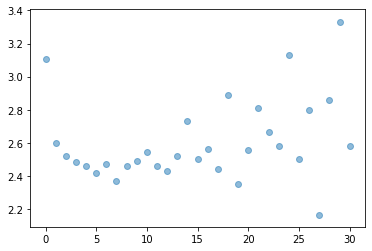

In [0]:
# The relation between photo posted and the adoption speed is not clear
Photo = pd.DataFrame(df.groupby('PhotoAmt')['AdoptionSpeed'].mean())
Photo.reset_index(inplace=True)
x = Photo['PhotoAmt']
y = Photo['AdoptionSpeed']
plt.scatter(x, y,alpha=0.5)
plt.show()

Photo
0    0.275660
1    0.507985
Name: Adoption_Speed_binary, dtype: float64

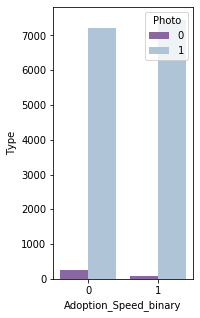

In [0]:
# Photo less than 1
df['Photo'] = np.where(df['PhotoAmt']<1,0,1)
grouped = pd.DataFrame(df.groupby(['Photo','Adoption_Speed_binary'])['Type'].agg('count'))
grouped.reset_index(inplace=True)
plt.figure(figsize=(2.5,5))

sns.barplot(x='Adoption_Speed_binary', hue="Photo", y='Type', data=grouped,palette="BuPu_r")

df.groupby('Photo')['Adoption_Speed_binary'].mean()
# Seems that posting at least one photo help

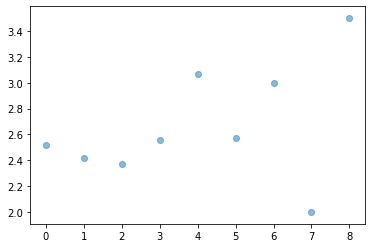

Video
0    0.502046
1    0.519164
Name: Adoption_Speed_binary, dtype: float64

In [0]:
# No Video and with Video

video = pd.DataFrame(df.groupby('VideoAmt')['AdoptionSpeed'].mean())
video.reset_index(inplace=True)

x = video['VideoAmt']
y = video['AdoptionSpeed']
plt.scatter(x, y,alpha=0.5)
plt.show()

# Post more than 0 Videos~
df['Video'] = np.where(df['VideoAmt']==0,0,1)
df.groupby('Video')['Adoption_Speed_binary'].mean()

<h2> Data Cleaning </h2>

In [0]:
df = df[ (df['Breed1']!=0) & (df['MaturitySize']!=0) & 
         (df['FurLength']!=0) & (df['Breed1']!=0) & 
         (df['Vaccinated']!=3) & (df['Dewormed']!=3) & 
       (df['Sterilized']!=3) & (df['Health']!=3)]

In [0]:
df[df['Type']==1]['Breed1'].value_counts()

307    4833
141     145
218     123
205     120
109     109
179     105
189      69
103      69
213      63
20       61
128      54
195      47
152      46
78       46
60       30
76       30
69       30
119      25
39       23
206      20
173      20
182      19
178      16
26       15
207      15
49       14
147      14
72       13
75       12
50       11
70       10
117      10
169      10
200       9
15        7
19        6
44        6
202       5
83        5
111       5
42        5
240       4
17        4
150       4
190       4
187       4
129       3
227       3
203       3
105       3
97        3
224       3
100       3
32        3
185       3
10        3
155       3
18        3
122       3
31        3
82        3
102       3
215       2
188       2
148       2
1         2
5         2
11        2
237       2
233       2
204       2
145       2
231       2
64        1
99        1
139       1
56        1
24        1
108       1
3         1
123       1
234       1
176       1
23  

In [0]:
# Dogs
df['Minority Breed'] = np.where(df['Breed1'].isin([307,205,141,179,218,109,103,20,213,189,128,195,152,78,60,76,69,
                                                   119,39,206,173,182,178,26,207,49,147,72,75,50,
                                                266,265,299,292,285,254,243,283,247]),0,1)
df['Shih Tzu'] = np.where(df['Breed1']==205,1,0) 
df['Labrador Retriever'] = np.where(df['Breed1']==141,1,0) 
df['Poodle'] = np.where(df['Breed1']==179,1,0) 
df['Terrier'] = np.where(df['Breed1']==218,1,0) 
df['Golden Retriver'] = np.where(df['Breed1']==109,1,0) 
df['German Shepherd Dog'] = np.where(df['Breed1'] ==103,1,0) 
df['Beagle'] = np.where(df['Breed1'] ==20,1,0)
df['Spitz'] = np.where(df['Breed1'] == 213,1,0) 
df['Rottweiler'] = np.where(df['Breed1'] ==189,1,0) 

df['Jack Russel Terrier'] = np.where(df['Breed1']==128,1,0) 
df['Schnauzer'] = np.where(df['Breed1']==195,1,0) 
df['Miniature Pinscher'] = np.where(df['Breed1']==152,1,0) 
df['Doberman Pinscher'] = np.where(df['Breed1']==78,1,0) 
df['Norwegian Buhund'] = np.where(df['Breed1']==60,1,0) 
df['Dalmatian'] = np.where(df['Breed1']==76,1,0) 
df['Cocker Spaniel'] = np.where(df['Breed1']==69,1,0) 

df['Husky'] = np.where(df['Breed1']==119,1,0)
df['Border Collie'] = np.where(df['Breed1']==39,1,0)
df['Siberian Husky'] = np.where(df['Breed1']==206,1,0)
df['Pit Bull Terrier'] = np.where(df['Breed1']==173,1,0)
df['Pug'] = np.where(df['Breed1']==182,1,0)
df['Pomeranian'] = np.where(df['Breed1']==178,1,0)
df['Vizsla'] = np.where(df['Breed1']==26,1,0)
df['Silky Terrier'] = np.where(df['Breed1']==207,1,0)

df['Bobtail'] = np.where(df['Breed1']==49,1,0)
df['Maltese'] = np.where(df['Breed1']==147,1,0)
df['Corgi'] = np.where(df['Breed1']==72,1,0)
df['Dachshund'] = np.where(df['Breed1']==75,1,0)
df['Bullmastiff'] = np.where(df['Breed1']==50,1,0)



# Cats
df['Domestic Short Hair'] = np.where(df['Breed1']==266,1,0)
df['Domestic Medium Hair'] = np.where(df['Breed1']==265,1,0)
df['Tabby'] = np.where(df['Breed1']==299,1,0)
df['Domestic Long Hair'] = np.where(df['Breed1']==264,1,0)
df['Siamese'] = np.where(df['Breed1']==292,1,0)
df['Persian'] = np.where(df['Breed1']==285,1,0)
df['Calico'] = np.where(df['Breed1']==254,1,0)
df['American Short Hair'] = np.where(df['Breed1']==243,1,0)
df['Original Short Hair'] = np.where(df['Breed1']==283,1,0)
df['Bengal'] = np.where(df['Breed1']==247,1,0)


In [0]:
df = df.drop(['Name','Age','Quantity','RescuerID','Breed1','Breed2','Color1','Color2','Color3','Fee','Description','PetID','VideoAmt','PhotoAmt','AdoptionSpeed','State'],axis=1)

In [0]:
df.head()

,Type,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Adoption_Speed_binary,one pet,Meaningful Name,MixType,Young,Free,Top_rescuer,Colors,Black_golden,Brown,Brown_white,Black,Black_white,Cream,White,Brown_cream,Black_gray,Black_yellow,Gray_white,Gray,Yellow_white,Golden,Brown_Golden,Cream_white,Photo,Video,Other Breed,Shih Tzu,Labrador Retriever,Poodle,Terrier,Golden Retriver,German Shepherd Dog,Beagle,Spitz,Rottweiler,Jack Russel Terrier,Schnauzer,Miniature Pinscher,Doberman Pinscher,Norwegian Buhund,Dalmatian,Cocker Spaniel,Domestic Short Hair,Domestic Medium Hair,Tabby,Domestic Long Hair,Siamese,Persian,Calico,American Short Hair,Original Short Hair,Bengal
0,2,1,1,1,2,2,2,1,1,1,1,0,1,0,0,17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,2,2,1,1,2,1,0,1,1,1,1,1,1,27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,2,2,1,1,1,2,1,1,1,1,1,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,2,1,2,2,2,1,1,1,1,1,1,1,1,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,2,2,1,2,2,2,1,1,1,0,0,1,1,0,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
dog = df[df['Type']==1]
cat = df[df['Type']==2]
dog = dog.drop(['Type','Colors','Domestic Short Hair','Domestic Medium Hair','Tabby',
                'Domestic Long Hair','Siamese','Persian','Calico','American Short Hair','Original Short Hair','Bengal'],axis=1)

cat = cat.drop(['Type','Colors','Shih Tzu','Labrador Retriever','Poodle',
                'Terrier','Golden Retriver','German Shepherd Dog','Beagle','Spitz','Rottweiler',
               'Jack Russel Terrier','Schnauzer','Miniature Pinscher','Doberman Pinscher','Norwegian Buhund','Dalmatian',
               'Cocker Spaniel','Husky','Border Collie','Siberian Husky','Pit Bull Terrier'],axis=1)




In [0]:
# Get an initial sense of how the features are correlated with the outcome variables
corr = pd.DataFrame(dog.corr()['Adoption_Speed_binary'] )
corr.reset_index(inplace=True)

corr.sort_values(by="Adoption_Speed_binary",ascending=False)

,index,Adoption_Speed_binary
7,Adoption_Speed_binary,1.000000
10,Adoption_Speed_binary1,0.596286
12,Young,0.191562
5,Sterilized,0.183250
3,Vaccinated,0.106075
2,FurLength,0.097085
4,Dewormed,0.066367
34,Shih Tzu,0.057997
14,Top_rescuer,0.052627
36,Poodle,0.049873


In [0]:
corr = pd.DataFrame(cat.corr()['Adoption_Speed_binary'] )
corr.reset_index(inplace=True)

corr.sort_values(by="Adoption_Speed_binary",ascending=False)

In [0]:
plt.figure(figsize=(30,30))
cor = dog.iloc[:,0:].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<h2> Model Training for dog </h2>

In [0]:
dog = dog.drop(['Adoption_Speed_binary1'],axis=1)

In [0]:
X = dog.loc[:, dog.columns != 'Adoption_Speed_binary']
y = dog['Adoption_Speed_binary']

In [0]:
# Best Subset Selection with Cross Validation
# Cross_val_score will automatically split n times 

from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE
from statistics import mean 
result = []

# feature extraction
for i in range(15,X.shape[1]):
    model = LogisticRegression(random_state=0,solver='lbfgs',max_iter=10000)
    rfe = RFE(model, i)
    reg = rfe.fit(X, y)
    features = list(X.columns[reg.support_])
    score = cross_val_score(rfe, X, y, cv=5)
    avg_score = mean(score)  # Compute the average score
    result.append((i,avg_score, features ))
    

In [0]:
results = pd.DataFrame(result)
best_idx = results[1].idxmax()
best_feature_list = results.iloc[best_idx,:].values[2]

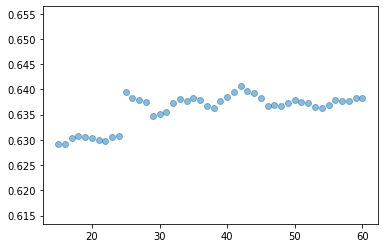

In [0]:
n_features = results[0]
accuracy = results[1]
plt.scatter(n_features, accuracy,alpha=0.5)
plt.show()

In [0]:
best_n_features = results.iloc[best_idx,0]
best_n_features

42

In [0]:
best_score = results.iloc[best_idx,1]
best_score

0.6407008115935645

In [0]:
# Retrain the models with all the data with only the best features
model = LogisticRegression(random_state=0,solver='lbfgs',max_iter=10000)

fit = model.fit(X[best_feature_list], y)
score = fit.score(X[best_feature_list], y)

from regressors import stats
p_value = stats.coef_pval(fit, X[best_feature_list], y)

In [0]:
score

0.650398873768184

In [0]:
# Combine all the coefficient, features, and p_values
coef = pd.DataFrame(fit.coef_.reshape(best_n_features,1)).rename(columns={0:"Coefficients"})
features = pd.DataFrame(np.array(best_feature_list)).rename(columns={0:"Features"})
p_value = pd.DataFrame(p_value[1:].reshape(best_n_features,1)).rename(columns={0:'p_value'})
coefs = pd.concat([features,coef,p_value],axis=1)
coefs.sort_values(by="Coefficients",ascending=False)

,Features,Coefficients,p_value
7,Young,1.076401,0.000000e+00
22,German Shepherd Dog,0.875228,0.000000e+00
16,Photo,0.834820,0.000000e+00
38,Maltese,0.751879,4.957648e-06
40,Dachshund,0.710012,3.789387e-05
34,Pug,0.708818,3.405012e-07
37,Silky Terrier,0.698616,7.114942e-06
35,Pomeranian,0.642650,2.162231e-05
18,Shih Tzu,0.631142,0.000000e+00
24,Rottweiler,0.612755,2.220446e-16


<h2> Model Training For Cats </h2>

In [0]:
X = cat.loc[:, dog.columns != 'Adoption_Speed_binary']
y = cat['Adoption_Speed_binary']

In [0]:
# Best Subset Selection with Cross Validation

result = []

# feature extraction
for i in range(6,X.shape[1]):
    model = LogisticRegression(random_state=0,solver='lbfgs',max_iter=10000)
    rfe = RFE(model, i)
    reg = rfe.fit(X, y)
    features = list(X.columns[reg.support_])
    score = cross_val_score(rfe, X, y, cv=5)
    avg_score = mean(score)
    result.append((i,avg_score, features ))
   

In [0]:
results = pd.DataFrame(result)
best_idx = results[1].idxmax()
best_feature_list = results.iloc[best_idx,:].values[2]

In [0]:
# Retrain the models with all the data with only the best features
model = LogisticRegression(random_state=0,solver='lbfgs',max_iter=10000)

fit = model.fit(X[best_feature_list], y)
score = fit.score(X[best_feature_list], y)

from regressors import stats
p_value = stats.coef_pval(fit, X[best_feature_list], y)

In [0]:
# Combine all the coefficient, features, and p_values
best_n_features = results.iloc[best_idx,0]
coef = pd.DataFrame(fit.coef_.reshape(best_n_features,1)).rename(columns={0:"Coefficients"})
features = pd.DataFrame(np.array(best_feature_list)).rename(columns={0:"Features"})
p_value = pd.DataFrame(p_value[1:].reshape(best_n_features,1)).rename(columns={0:'p_value'})
coefs = pd.concat([features,coef,p_value],axis=1)
coefs.sort_values(by="Coefficients",ascending=False)

In [0]:
best_n_features